In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import time
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTEENN

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Python1/Projects/Heart_Disease_Prediction/heartdisease_u5z_lx9fv.csv')
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Diabetes              253680 non-null  float64
 6   PhysActivity          253680 non-null  float64
 7   Fruits                253680 non-null  float64
 8   Veggies               253680 non-null  float64
 9   HvyAlcoholConsump     253680 non-null  float64
 10  MentHlth              253680 non-null  float64
 11  PhysHlth              253680 non-null  float64
 12  Sex                   253680 non-null  float64
 13  Age                   253680 non-null  float64
 14  Education             253680 non-null  float64
 15  

***1. Including univariate analysis to understand the distribution of features.***

In [ ]:
# Display basic statistical summaries for each feature
print("Statistical Summaries:")
print(data.describe())

Statistical Summaries:
       HeartDiseaseorAttack         HighBP       HighChol            BMI  \
count         253680.000000  253680.000000  253680.000000  253680.000000   
mean               0.094186       0.429001       0.424121      28.382364   
std                0.292087       0.494934       0.494210       6.608694   
min                0.000000       0.000000       0.000000      12.000000   
25%                0.000000       0.000000       0.000000      24.000000   
50%                0.000000       0.000000       0.000000      27.000000   
75%                0.000000       1.000000       1.000000      31.000000   
max                1.000000       1.000000       1.000000      98.000000   

              Smoker       Diabetes   PhysActivity         Fruits  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.443169       0.296921       0.756544       0.634256   
std         0.496761       0.698160       0.429169       0.481639   
min         0.00

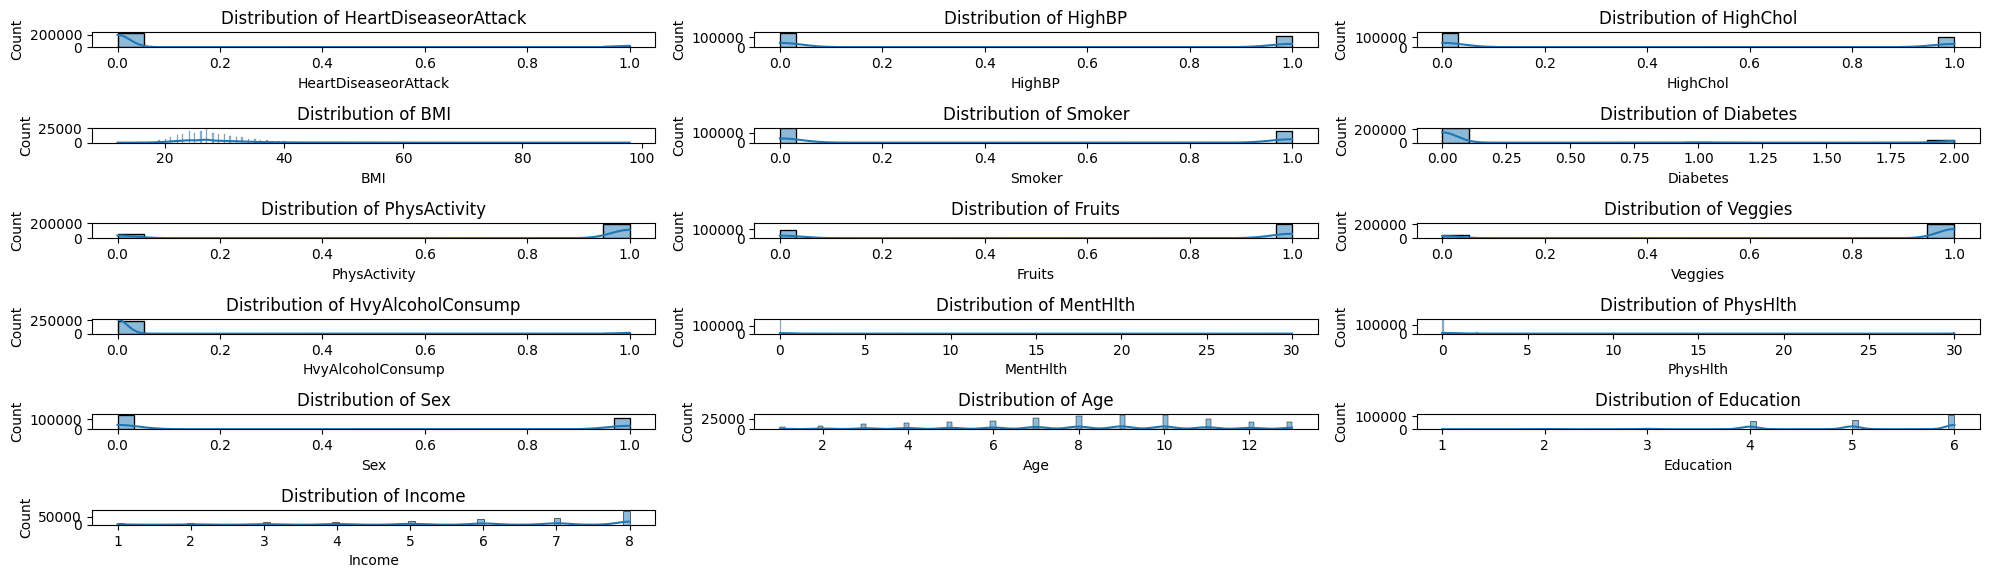

In [ ]:
# Visualize the distribution of each numerical feature
numerical_features = data.select_dtypes(include=['float64']).columns

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 3, i + 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

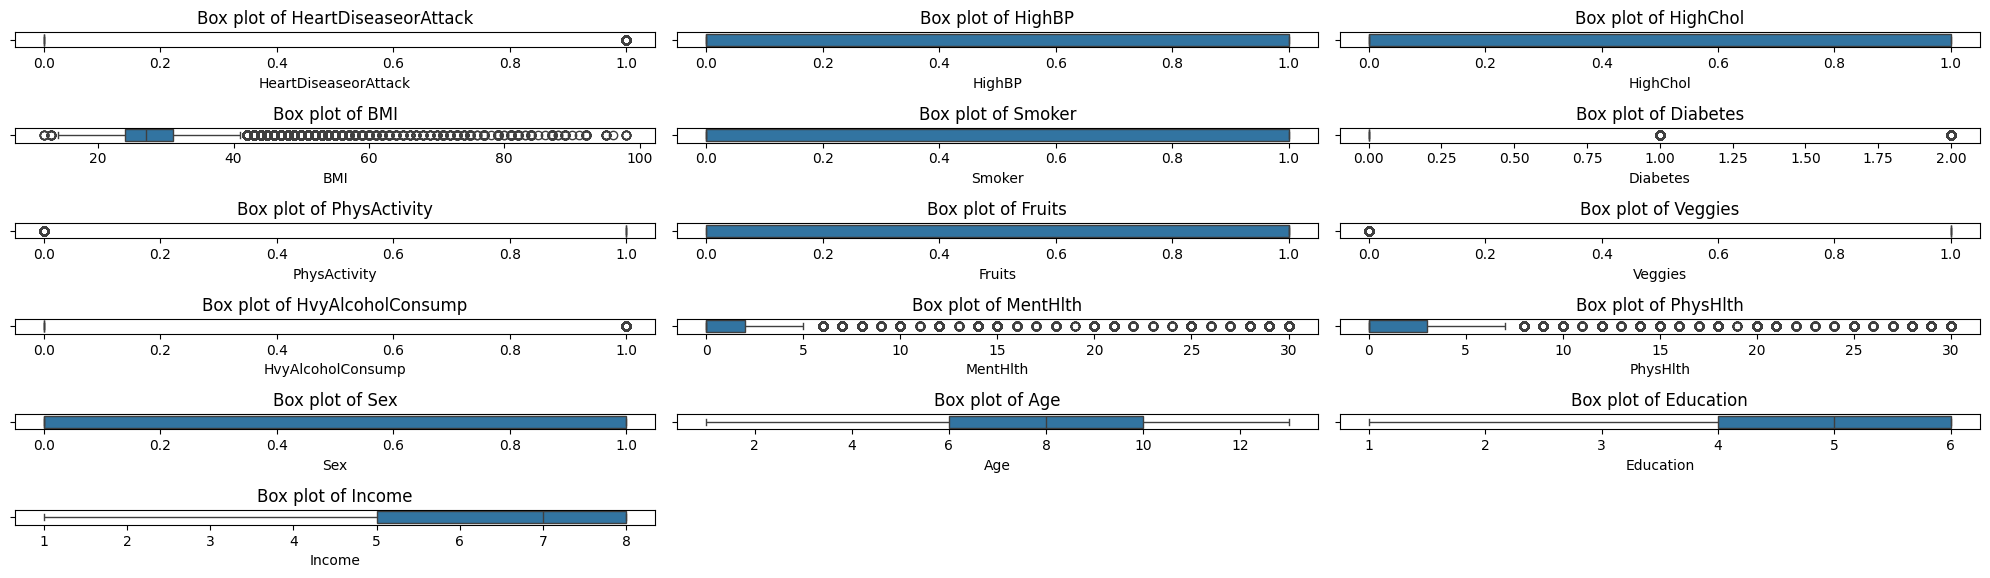

In [ ]:
# Visualize the box plot of each numerical feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 3, i + 1)
    sns.boxplot(x=data[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

***2. Including multivariate analysis to determine the correlations and analysis of target variables.***

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                      HeartDiseaseorAttack    HighBP  HighChol       BMI  \
HeartDiseaseorAttack              1.000000  0.209361  0.180765  0.052904   
HighBP                            0.209361  1.000000  0.298199  0.213748   
HighChol                          0.180765  0.298199  1.000000  0.106722   
BMI                               0.052904  0.213748  0.106722  1.000000   
Smoker                            0.114441  0.096991  0.091299  0.013804   
Diabetes                          0.180272  0.271596  0.209085  0.224379   
PhysActivity                     -0.087299 -0.125267 -0.078046 -0.147294   
Fruits                           -0.019790 -0.040555 -0.040859 -0.087518   
Veggies                          -0.039167 -0.061266 -0.039874 -0.062275   
HvyAlcoholConsump                -0.028991 -0.003972 -0.011543 -0.048736   
MentHlth                          0.064621  0.056456  0.062069  0.085310   
PhysHlth                          0.181698  0.161212  0.121751  0.12

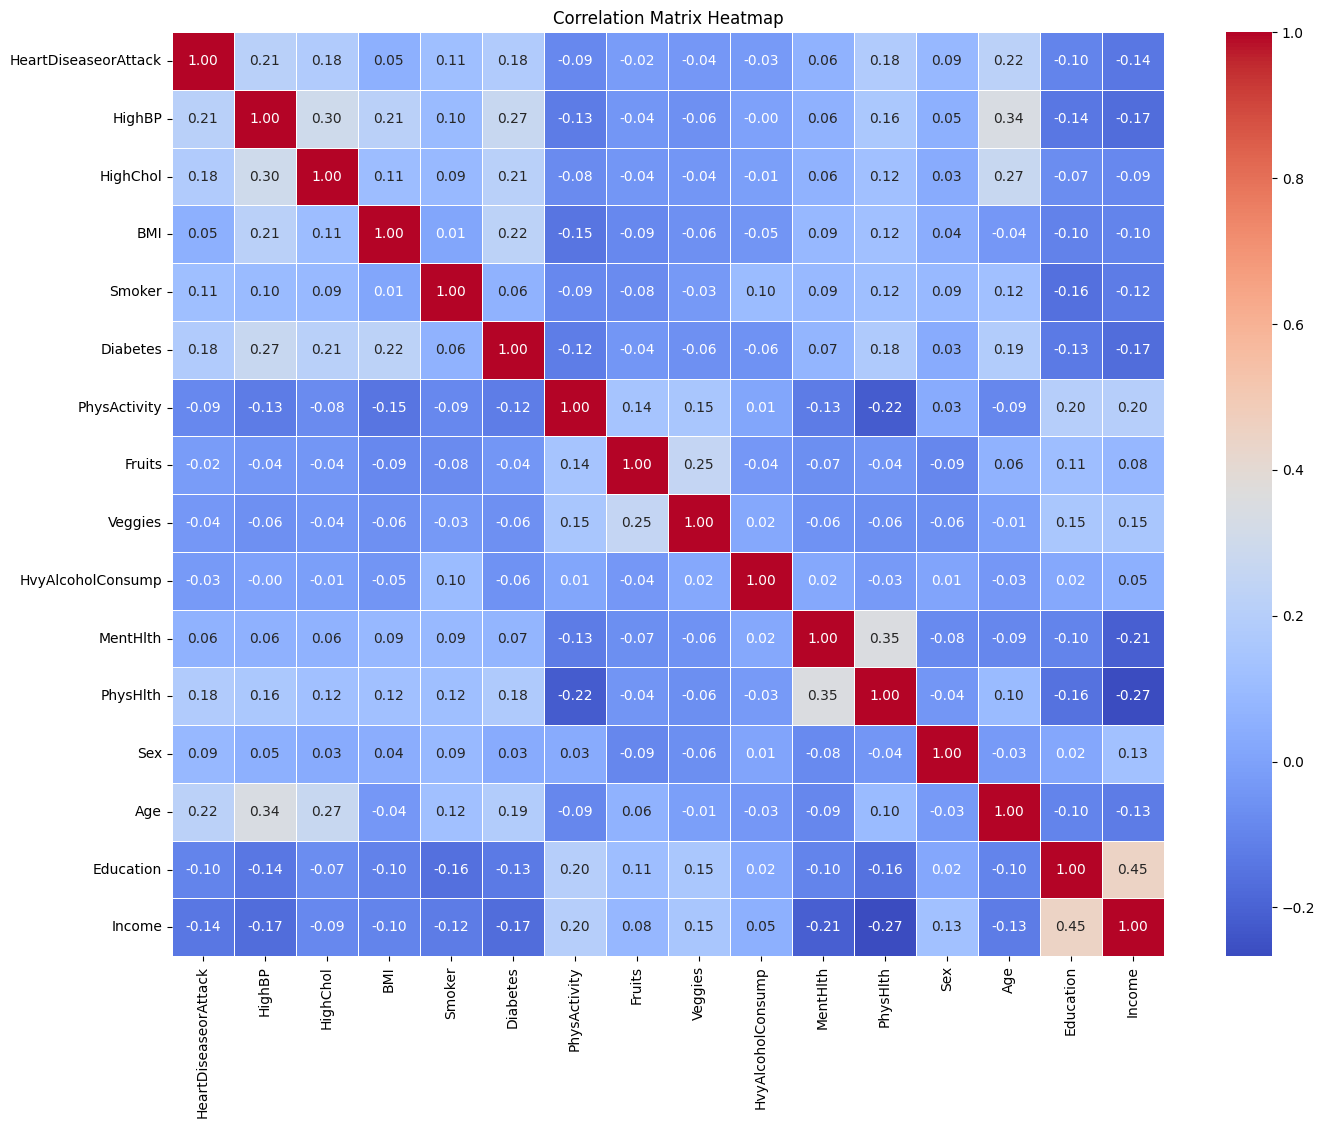

In [ ]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


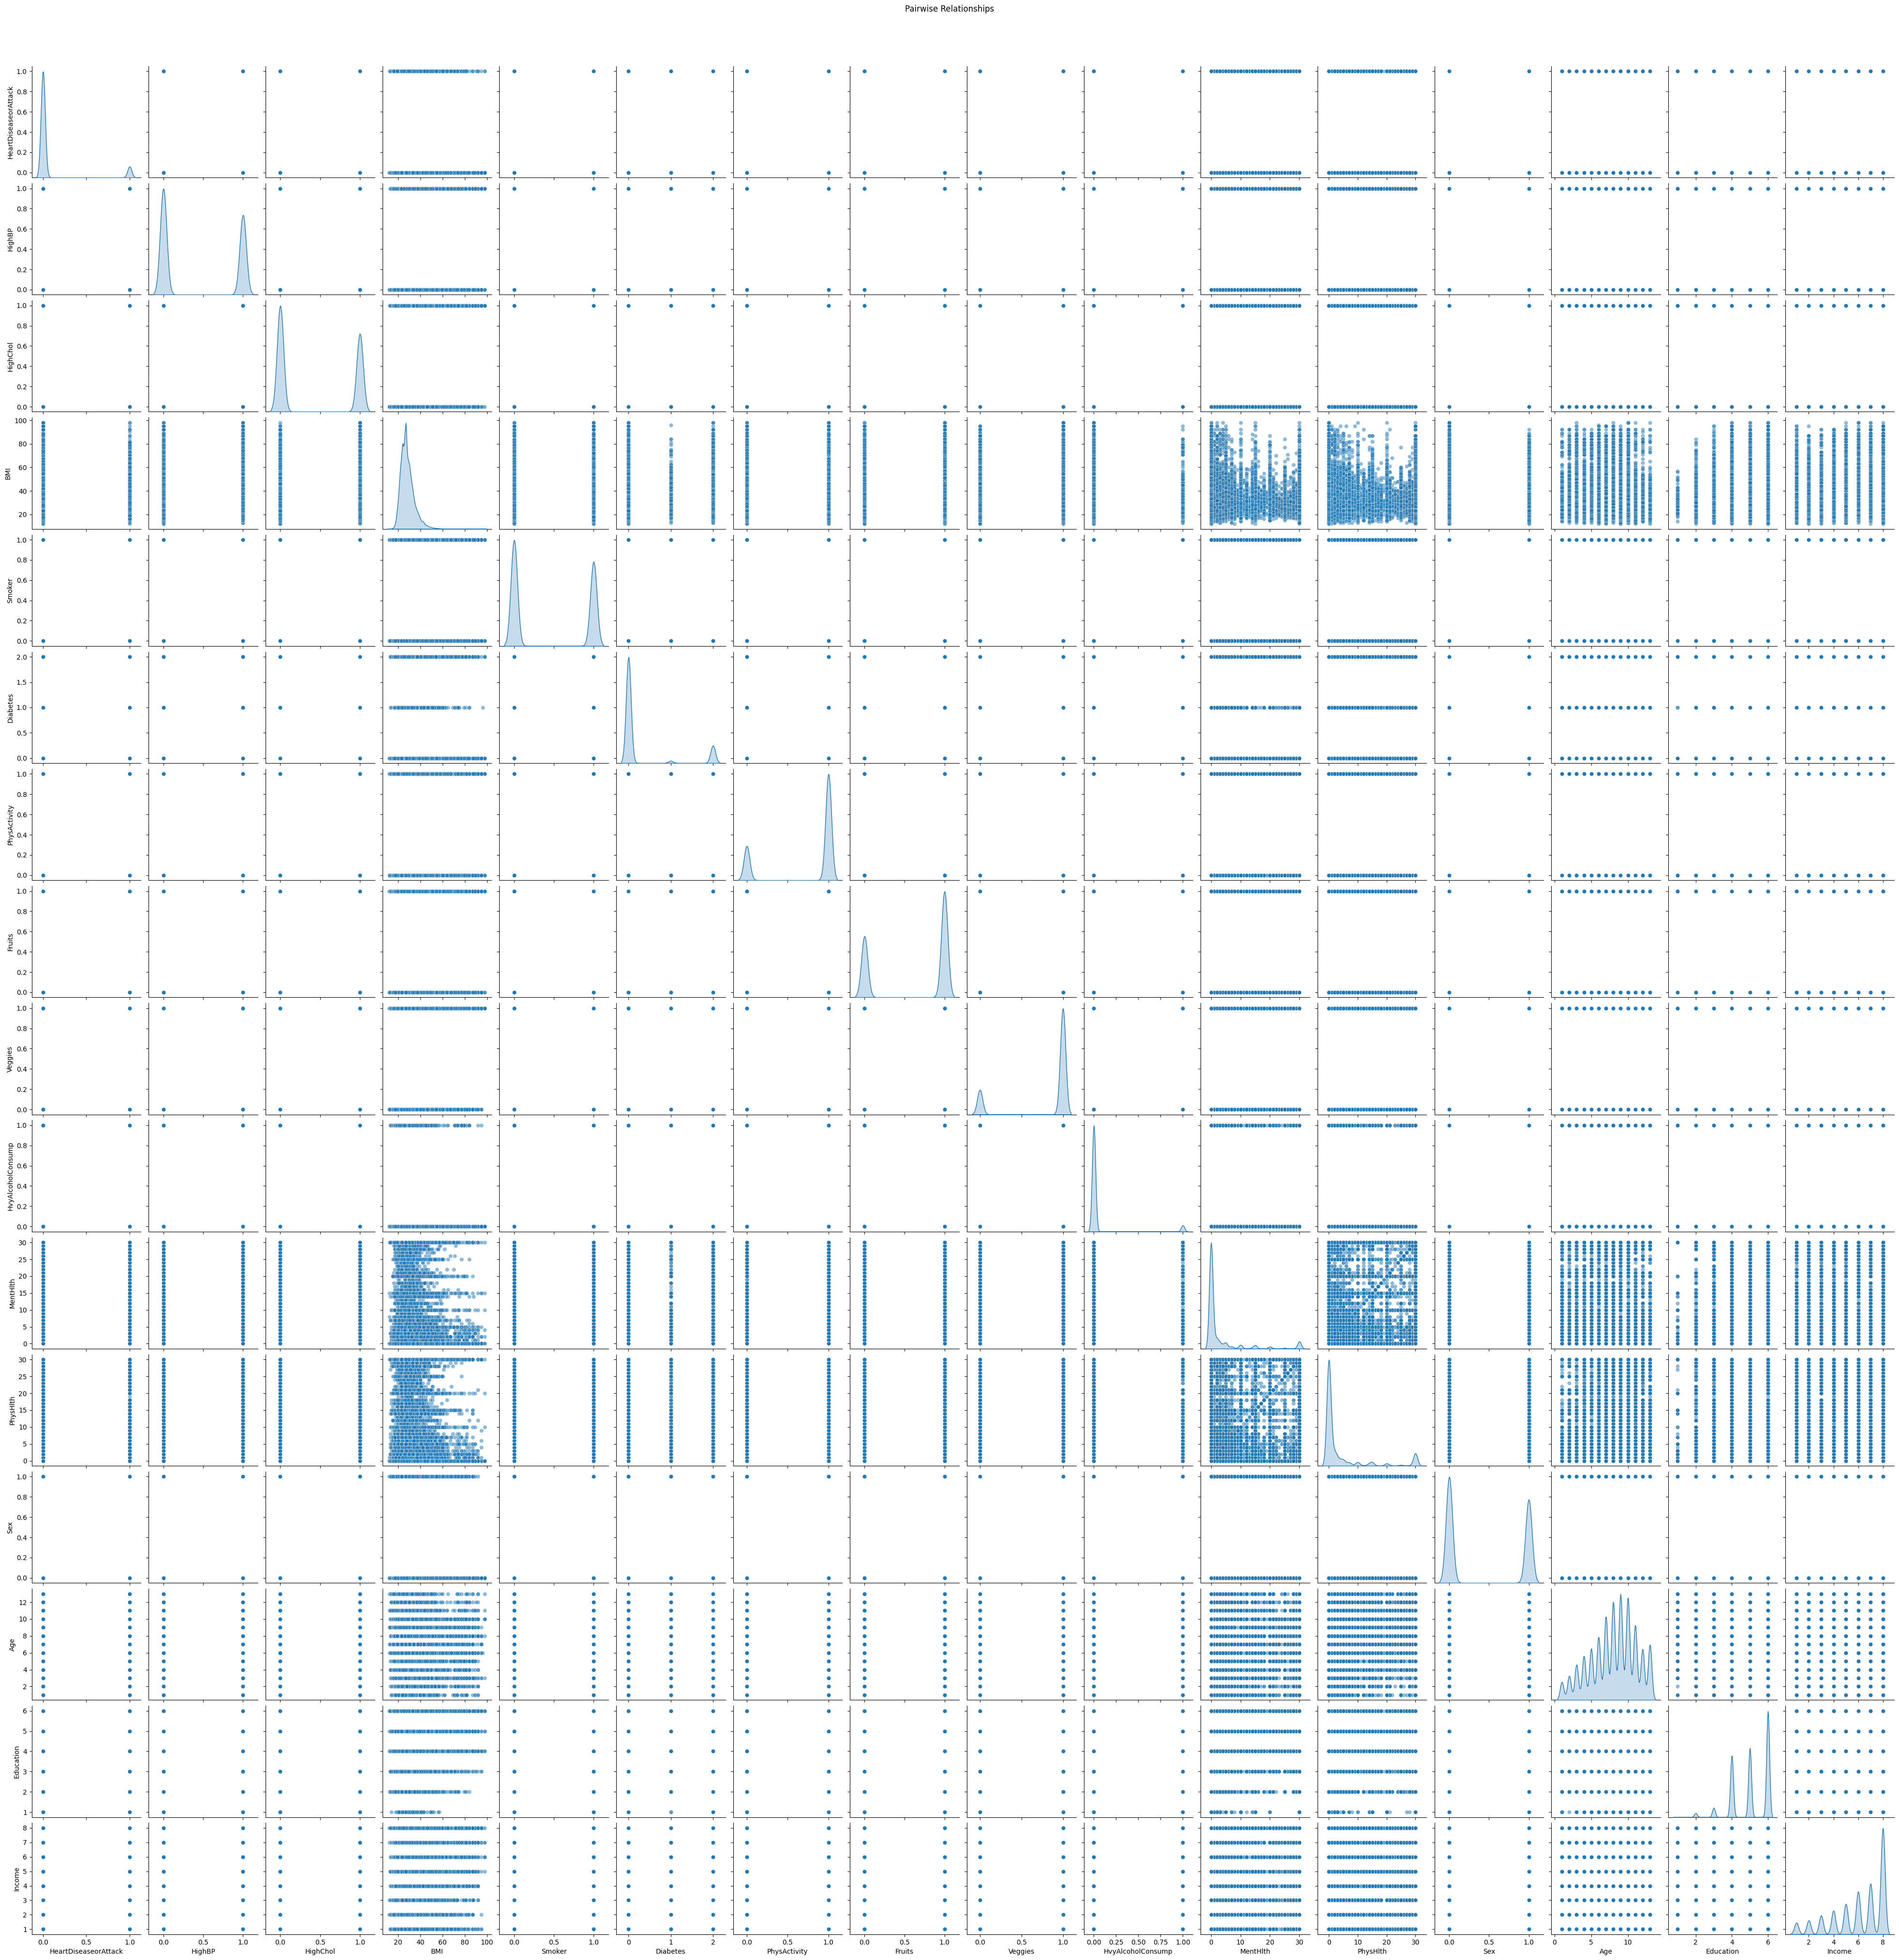

In [ ]:
# Pair plots to visualize pairwise relationships
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


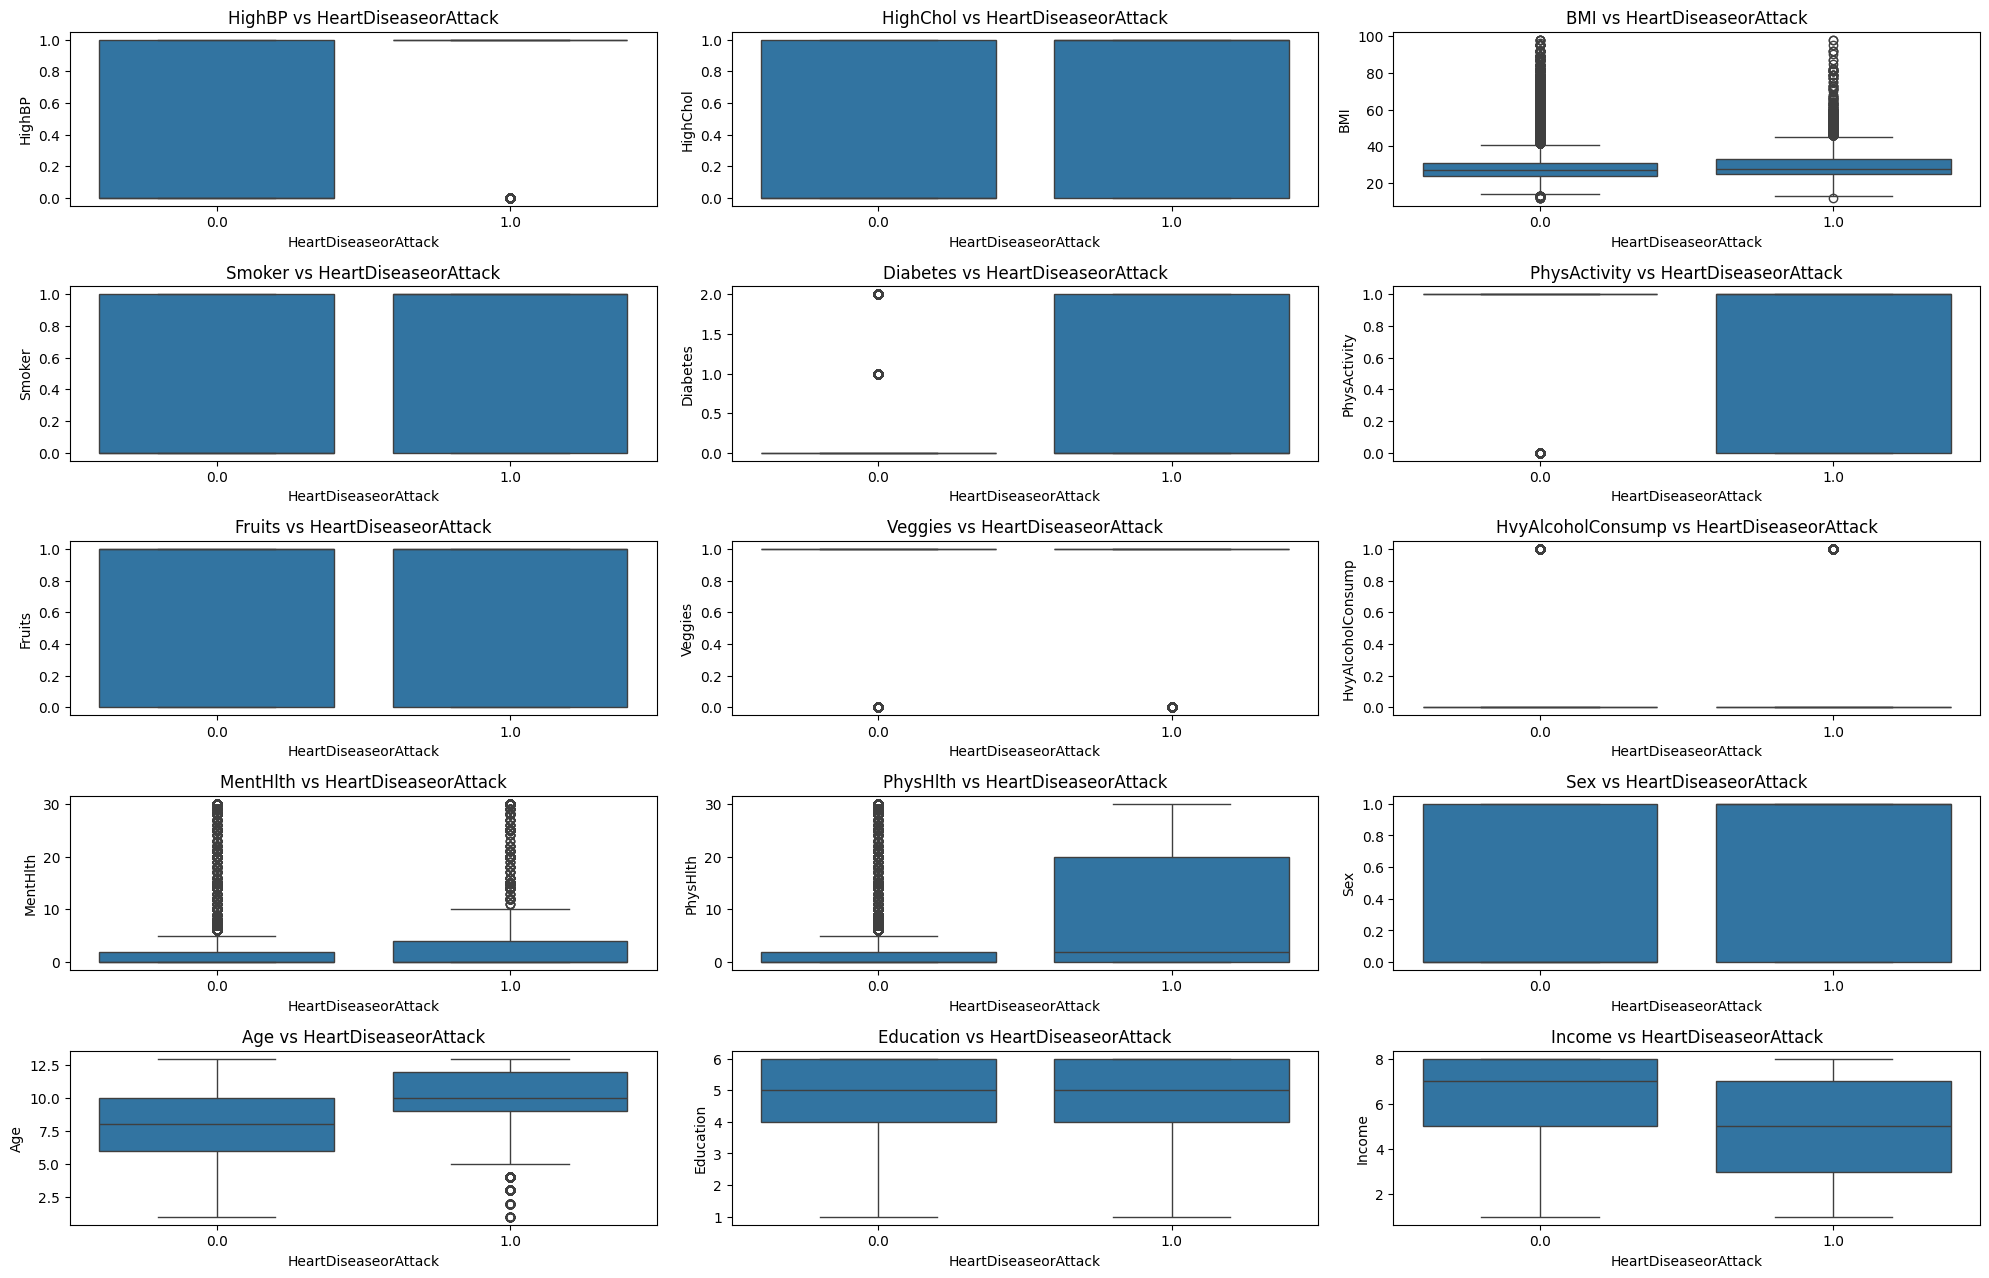

In [ ]:
# Box plots to analyze how features relate to the target variable
target_variable = 'HeartDiseaseorAttack'  # Adjust based on your target column name
plt.figure(figsize=(20, 15))
for i, feature in enumerate(data.columns.drop(target_variable)):
    plt.subplot((len(data.columns) - 1) // 3 + 1, 3, i + 1)
    sns.boxplot(x=target_variable, y=feature, data=data)
    plt.title(f'{feature} vs {target_variable}')
plt.tight_layout()
plt.show()


***3. To determine if new features can be created, based on the given data***

In [ ]:
# 1. Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data.select_dtypes(include=[np.number]))
poly_feature_names = poly.get_feature_names_out(data.select_dtypes(include=[np.number]).columns)
poly_data = pd.DataFrame(poly_features, columns=poly_feature_names)
print("Polynomial Features:")
print(poly_data.head())


Polynomial Features:
   HeartDiseaseorAttack  HighBP  HighChol   BMI  Smoker  Diabetes  \
0                   0.0     1.0       1.0  40.0     1.0       0.0   
1                   0.0     0.0       0.0  25.0     1.0       0.0   
2                   0.0     1.0       1.0  28.0     0.0       0.0   
3                   0.0     1.0       0.0  27.0     0.0       0.0   
4                   0.0     1.0       1.0  24.0     0.0       0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  ...  Sex^2  Sex Age  \
0           0.0     0.0      1.0                0.0  ...    0.0      0.0   
1           1.0     0.0      0.0                0.0  ...    0.0      0.0   
2           0.0     1.0      0.0                0.0  ...    0.0      0.0   
3           1.0     1.0      1.0                0.0  ...    0.0      0.0   
4           1.0     1.0      1.0                0.0  ...    0.0      0.0   

   Sex Education  Sex Income  Age^2  Age Education  Age Income  Education^2  \
0            0.0         0.0

In [ ]:
# 2. Binning
# Example: Age Binning
data['Age_Binned'] = pd.cut(data['Age'], bins=[0, 30, 40, 50, 60, 70, 80, 90, 100], labels=False)
print("Age Binning:")
print(data[['Age', 'Age_Binned']].head())


Age Binning:
    Age  Age_Binned
0   9.0           0
1   7.0           0
2   9.0           0
3  11.0           0
4  11.0           0


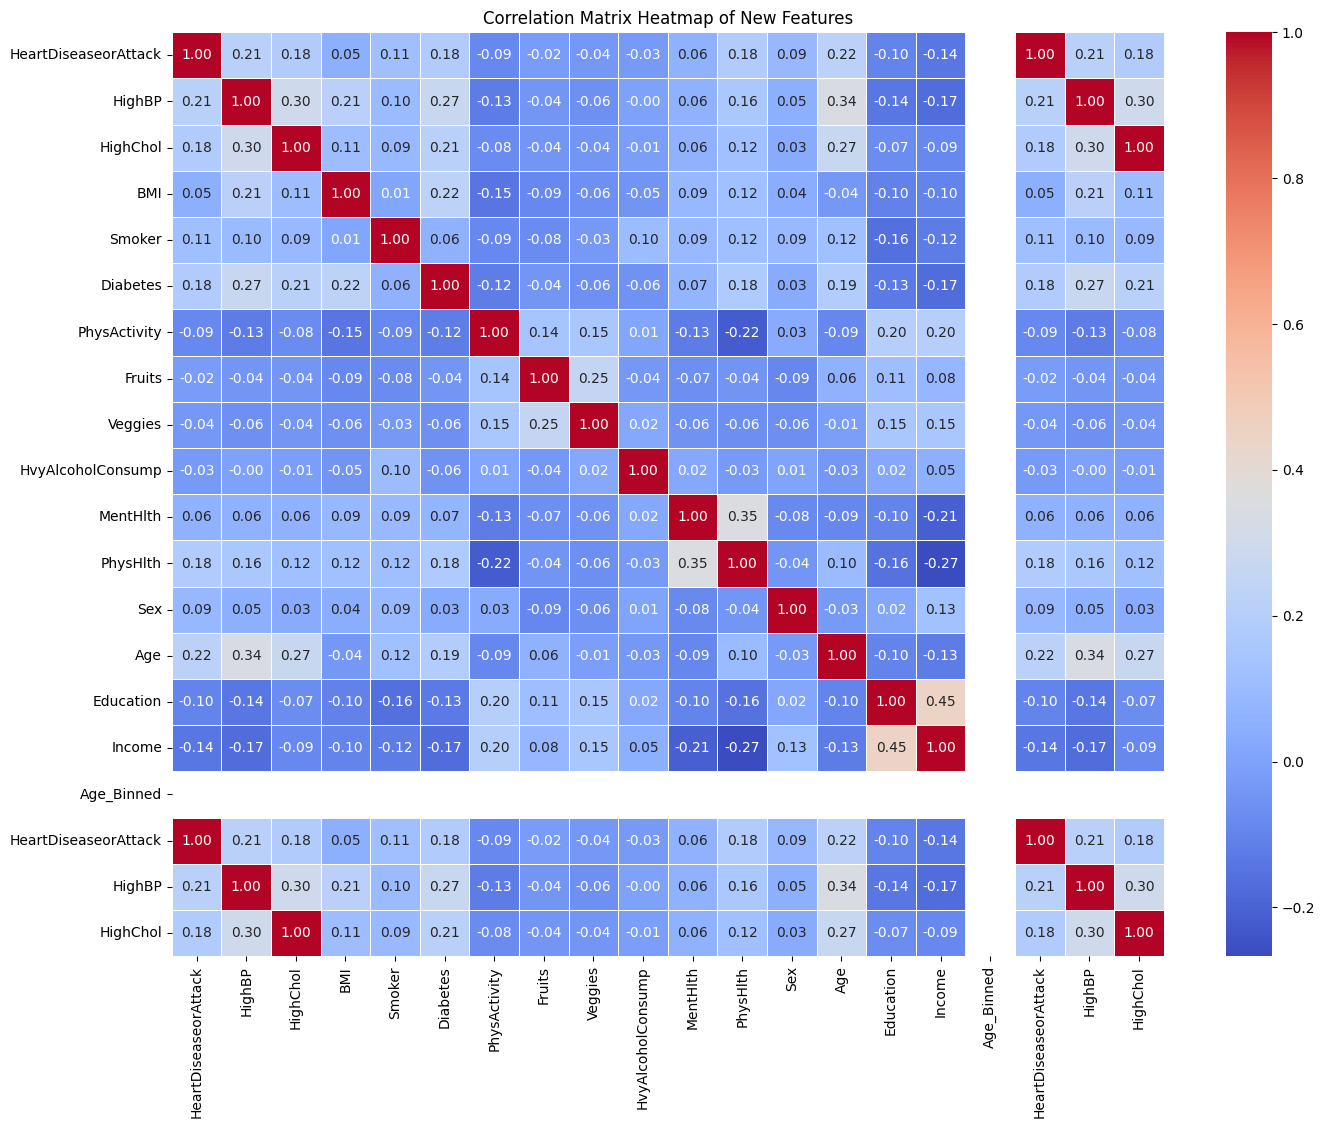

In [ ]:
# 3. Aggregation
# Example: Sum of Specific Features
# Assuming the dataset has features like SystolicBP, DiastolicBP
# df['BloodPressure_Sum'] = df['SystolicBP'] + df['DiastolicBP']

# 4. Domain-Specific Features
# Example: BMI calculation if weight and height are given
# df['BMI'] = df['Weight'] / (df['Height']/100)**2

# Check the correlation of new features with the target variable
new_features = ['Age_Binned'] + list(poly_data.columns)
data_all = pd.concat([data, poly_data], axis=1)
correlation_matrix = data_all.corr()

# Plot the heatmap of the correlation matrix for new features
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix.iloc[:20, :20], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap of New Features')
plt.show()


***4. Layout binary classification experimentation space (i.e determine the list of models you would like to experiment with)***

In [ ]:
# Use a smaller subset of the data for initial testing
sample_data = data.sample(frac=0.3, random_state=42)

# Define feature set and target variable
X = sample_data.drop('HeartDiseaseorAttack', axis=1)
y = sample_data['HeartDiseaseorAttack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of models to experiment with
models = [
    ('Logistic Regression', LogisticRegression(max_iter=100)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=5)),
    ('Random Forest', RandomForestClassifier(n_estimators=50, max_depth=5, n_jobs=-1)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=50, max_depth=5)),
    ('Support Vector Machine', SVC(probability=True, kernel='linear')),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5))
]

# Function to evaluate each model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    end_time = time.time()
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'time': end_time - start_time
    }

# Evaluate all models and store results
results = {}
for name, model in models:
    print(f'Evaluating {name}...')
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)


Evaluating Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating Decision Tree...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating Gradient Boosting...
Evaluating Support Vector Machine...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating K-Nearest Neighbors...
Logistic Regression       {'accuracy': 0.9053281650351488, 'precision': ...
Decision Tree             {'accuracy': 0.9068392352670652, 'precision': ...
Random Forest             {'accuracy': 0.9068392352670652, 'precision': ...
Gradient Boosting         {'accuracy': 0.9066421391498587, 'precision': ...
Support Vector Machine    {'accuracy': 0.9068392352670652, 'precision': ...
K-Nearest Neighbors       {'accuracy': 0.8938308915314368, 'precision': ...
dtype: object


***5. Using precision-recall curves to determine best threshold***

Best Threshold: 0.16
Best F1 Score: 0.33


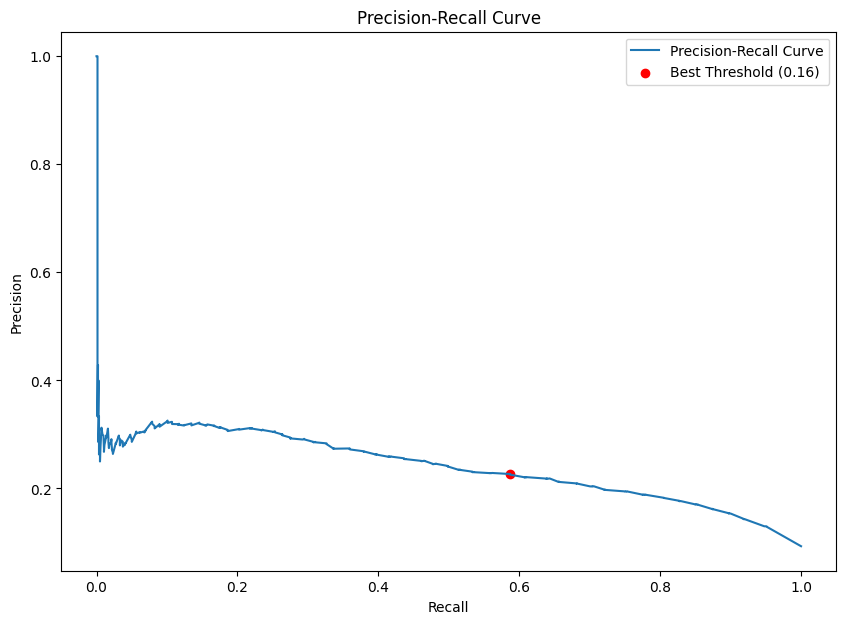

In [ ]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Compute F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that maximizes the F1 score
best_threshold = thresholds[np.argmax(f1_scores)]
print(f'Best Threshold: {best_threshold:.2f}')
print('=============================================')
# Display the F1 score at the best threshold
best_f1 = np.max(f1_scores)
print(f'Best F1 Score: {best_f1:.2f}')

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.scatter(recall[np.argmax(f1_scores)], precision[np.argmax(f1_scores)], marker='o', color='red', label=f'Best Threshold ({best_threshold:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


***6. Publish the performance of all the models on the same hold-out/ test
dataset***

In [ ]:
# Define a list of models to experiment with
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC(probability=True)),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Function to evaluate each model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

# Evaluate all models and store results
results = {}
for name, model in models:
    print(f'Evaluating {name}...')
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Convert results to DataFrame
results_data = pd.DataFrame(results).T
print(results_data)

# Save the results to a CSV file
results_data.to_csv('model_performance_comparison.csv', index=True)


Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating Support Vector Machine...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating K-Nearest Neighbors...
                        accuracy  precision    recall  f1_score   roc_auc
Logistic Regression     0.905460   0.450237  0.066996  0.116636  0.812517
Decision Tree           0.845937   0.212647  0.241890  0.226328  0.578221
Random Forest           0.899612   0.311644  0.064175  0.106433  0.777711
Gradient Boosting       0.906576   0.488235  0.058533  0.104534  0.819322
Support Vector Machine  0.906839   0.000000  0.000000  0.000000  0.500423
K-Nearest Neighbors     0.893831   0.277027  0.086742  0.132116  0.665380


***7. List out the most important drivers of heart disease or attack.***

In [ ]:
# Train a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set and evaluate the accuracy
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('===================================================')

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

Accuracy: 89.88%
              Feature  Importance
2                 BMI    0.231434
12                Age    0.129255
14             Income    0.117783
10           PhysHlth    0.105224
13          Education    0.082604
9            MentHlth    0.075412
6              Fruits    0.039032
4            Diabetes    0.032476
0              HighBP    0.031968
7             Veggies    0.031431
5        PhysActivity    0.030525
3              Smoker    0.027618
1            HighChol    0.026929
11                Sex    0.026861
8   HvyAlcoholConsump    0.011447
15         Age_Binned    0.000000


***8. Using techniques such as oversampling, undersampling to handle class-imbalance.***

In [ ]:
# Use a smaller subset of the data for initial testing
sample_data = data.sample(frac=0.3, random_state=42)

# Define feature set and target variable
X = sample_data.drop('HeartDiseaseorAttack', axis=1)
y = sample_data['HeartDiseaseorAttack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate each model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

# Define a list of models to experiment with
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC(probability=True)),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Define sampling techniques
sampling_techniques = {
    'None': (X_train, y_train),
    'Oversampling': RandomOverSampler(random_state=42).fit_resample(X_train, y_train),
    'Undersampling': RandomUnderSampler(random_state=42).fit_resample(X_train, y_train),
    'SMOTE': SMOTE(random_state=42).fit_resample(X_train, y_train)
}

# Evaluate models with different sampling techniques
all_results = {}
for technique, (X_res, y_res) in sampling_techniques.items():
    print(f'Evaluating models with {technique}...')
    results = {}
    for name, model in models:
        print(f'  {name}...')
        results[name] = evaluate_model(model, X_res, X_test, y_res, y_test)
    all_results[technique] = results

# Convert results to DataFrame for comparison
results_df = pd.DataFrame({
    (technique, model_name): metrics
    for technique, models in all_results.items()
    for model_name, metrics in models.items()
}).T

# Display the results
print(results_df)

# Optionally, save the results to a CSV file
results_df.to_csv('model_performance_with_sampling_techniques.csv', index=True)


Evaluating models with None...
  Logistic Regression...
  Decision Tree...
  Random Forest...
  Gradient Boosting...
  Support Vector Machine...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  K-Nearest Neighbors...
Evaluating models with Oversampling...
  Logistic Regression...
  Decision Tree...
  Random Forest...
  Gradient Boosting...
  Support Vector Machine...
  K-Nearest Neighbors...
Evaluating models with Undersampling...
  Logistic Regression...
  Decision Tree...
  Random Forest...
  Gradient Boosting...
  Support Vector Machine...
  K-Nearest Neighbors...
Evaluating models with SMOTE...
  Logistic Regression...
  Decision Tree...
  Random Forest...
  Gradient Boosting...
  Support Vector Machine...
  K-Nearest Neighbors...
                                      accuracy  precision    recall  f1_score  \
None          Logistic Regression     0.905394   0.448113  0.066996  0.116564   
              Decision Tree           0.844031   0.209246  0.242595  0.224690   
              Random Forest           0.898495   0.303406  0.069111  0.112579   
              Gradient Boosting       0.906576   0.488235  0.058533  0.104534   
              Support Vector Machine  0.90

***9. Additional: Using model pipeline to create end to end training and
inference pipelines.***

In [6]:
# Use smaller subset data for initial testing
sample_data = data.sample(frac=0.3, random_state=42)

# Define feature set and target variable
X = sample_data.drop('HeartDiseaseorAttack', axis=1)
y = sample_data['HeartDiseaseorAttack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical features
numerical_features = X.columns

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features)
    ]
)

# Function to create a model pipeline
def create_pipeline(model):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

# Define a list of models to experiment with
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC(probability=True)),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Function to evaluate each model pipeline
def evaluate_model(pipeline, X_train, X_test, y_train, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else None
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

# Evaluate all model pipelines and store results
results = {}
for name, model in models:
    print(f'Evaluating {name}...')
    pipeline = create_pipeline(model)
    results[name] = evaluate_model(pipeline, X_train, X_test, y_train, y_test)

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Display the results
print(results_df)

# Optionally, save the results to a CSV file
results_df.to_csv('model_pipeline_performance.csv', index=True)


Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating Support Vector Machine...
Evaluating K-Nearest Neighbors...
                        accuracy  precision    recall  f1_score   roc_auc
Logistic Regression     0.905394   0.448113  0.066996  0.116564  0.812528
Decision Tree           0.846265   0.216830  0.248942  0.231779  0.581372
Random Forest           0.898233   0.277966  0.057828  0.095738  0.777559
Gradient Boosting       0.906576   0.488235  0.058533  0.104534  0.819322
Support Vector Machine  0.906511   0.380952  0.005642  0.011119  0.617859
K-Nearest Neighbors     0.893371   0.283298  0.094499  0.141724  0.689229
